# **1. Perkenalan Dataset**


**Sumber Dataset**: [Graduate Admission 2](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions/data)

Dataset ini dirancang khusus untuk memprediksi peluang seorang calon mahasiswa untuk diterima di program Pascasarjana (S2/S3), terutama dari perspektif mahasiswa di India.

Tujuan utamanya adalah untuk membantu calon mahasiswa mengevaluasi profil mereka dan memperkirakan kemungkinan mereka diterima di berbagai universitas.

# **2. Import Library**

In [1]:
# Mengimpor libraries umum yang sering digunakan
import kagglehub
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd

# Mengimpor libraries untuk visualisasi
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
os.makedirs('dataset', exist_ok=True)

emmarex_plantdisease_path = kagglehub.dataset_download('mohansacharya/graduate-admissions')

shutil.move(emmarex_plantdisease_path, './dataset2')

print('Data source import complete.')

100%|██████████| 9.64k/9.64k [00:00<00:00, 14.1MB/s]

Extracting files...
Data source import complete.


In [3]:
dataset = pd.read_csv('/content/dataset2/Admission_Predict.csv')
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [5]:
print("\nMissing values per column:")
print(dataset.isnull().sum())
print("\nNon-finite values per column:")
print(dataset.apply(lambda x: np.isfinite(x).sum() != len(x)))


Missing values per column:
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Non-finite values per column:
Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool


**Isi Dataset:**
Dataset ini mencakup beberapa parameter penting yang menjadi bahan pertimbangan dalam proses seleksi, yaitu:
* **Skor GRE** (skala 0-340)
* **Skor TOEFL** (skala 0-120)
* **Peringkat Universitas** tujuan (skala 1-5)
* **Kualitas Statement of Purpose (SOP)** dan **Surat Rekomendasi (LOR)** (skala 1-5)
* **IPK Sarjana (CGPA)** (skala 0-10)
* **Pengalaman Riset** (nilai 1 jika ada, 0 jika tidak ada)
* **Chance of Admit (Peluang Diterima)**: Ini adalah kolom target yang ingin diprediksi, dengan nilai antara 0 (tidak mungkin) hingga 1 (sangat mungkin).

In [6]:
df = dataset.copy()
df.rename(columns = {
    'Serial No.':'Serial_No',
    'GRE Score':'GRE_Score',
    'TOEFL Score':'TOEFL_Score',
    'University Rating':'University_Rating',
    'SOP':'SOP',
    'LOR ':'LOR',
    'CGPA':'CGPA',
    'Research':'Research',
    'Chance of Admit ':'Chance_of_Admit'
}, inplace=True)

In [7]:
df.drop('Serial_No', axis=1, inplace=True)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [8]:
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


Insight:
* Skor GRE: Rata-rata pendaftar punya skor GRE yang bagus. Kebanyakan nilainya ada di rentang 290 hingga 340. Jadi, persaingannya cukup ketat di skor ini.
* Skor TOEFL: Sama seperti GRE, skor TOEFL para pendaftar juga tinggi. Paling banyak pendaftar dapat skor antara 92 hingga 120
* IPK (CGPA): IPK para pendaftar juga sangat bagus. Nilainya banyak menumpuk di rentang 6.80 hingga 9.20 (dari skala 10), menunjukkan persaingan akademik yang ketat.


In [9]:
df.isna().sum()

,0
GRE_Score,0
TOEFL_Score,0
University_Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance_of_Admit,0


In [10]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


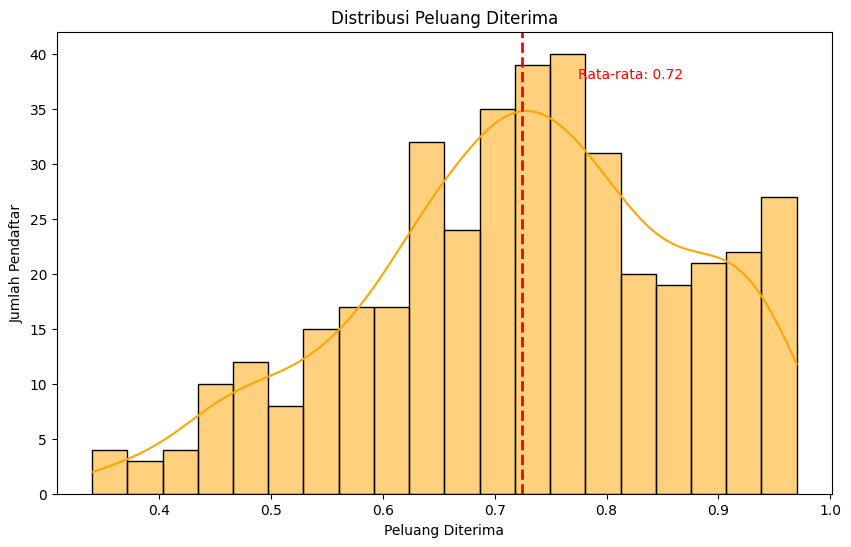


Rata-rata peluang diterima: 0.7244


In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Chance_of_Admit'], kde=True, bins=20, color='orange')

# Menghitung rata-rata
mean_chance = df['Chance_of_Admit'].mean()

# Menambahkan garis rata-rata
plt.axvline(mean_chance, color='red', linestyle='--', linewidth=2)

# Menambahkan teks nilai rata-rata
plt.text(mean_chance + 0.05, plt.ylim()[1]*0.9,
         f'Rata-rata: {mean_chance:.2f}',
         color='red', fontsize=10)

plt.title('Distribusi Peluang Diterima')
plt.xlabel('Peluang Diterima')
plt.ylabel('Jumlah Pendaftar')
plt.show()

# Menampilkan nilai mean di console juga
print(f"\nRata-rata peluang diterima: {mean_chance:.4f}")

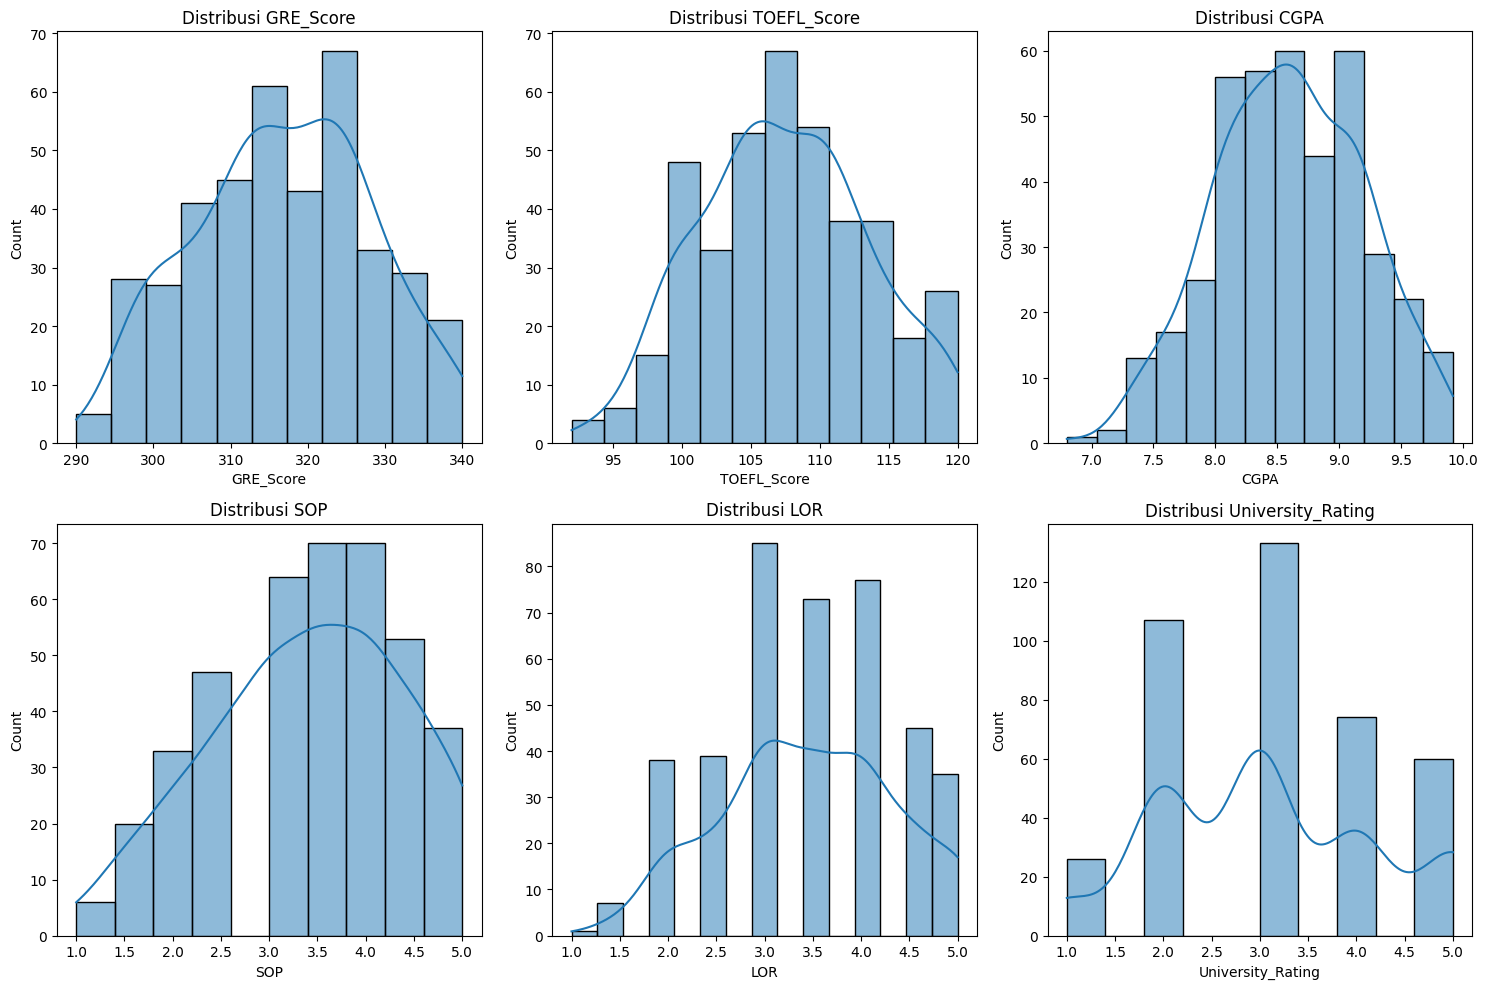

In [12]:
numeric_features = ['GRE_Score', 'TOEFL_Score', 'CGPA', 'SOP', 'LOR', 'University_Rating']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

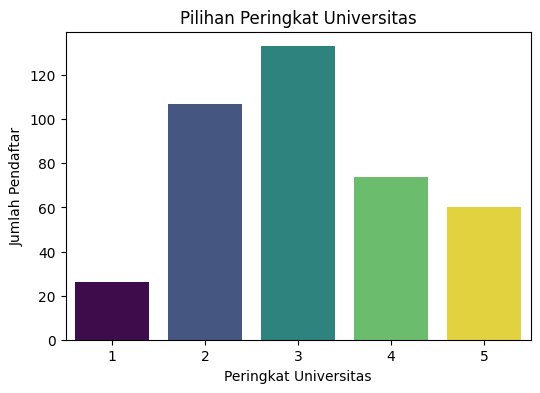

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='University_Rating', data=df, hue='University_Rating', palette='viridis', legend=False)
plt.title('Pilihan Peringkat Universitas')
plt.xlabel('Peringkat Universitas')
plt.ylabel('Jumlah Pendaftar')
plt.show()

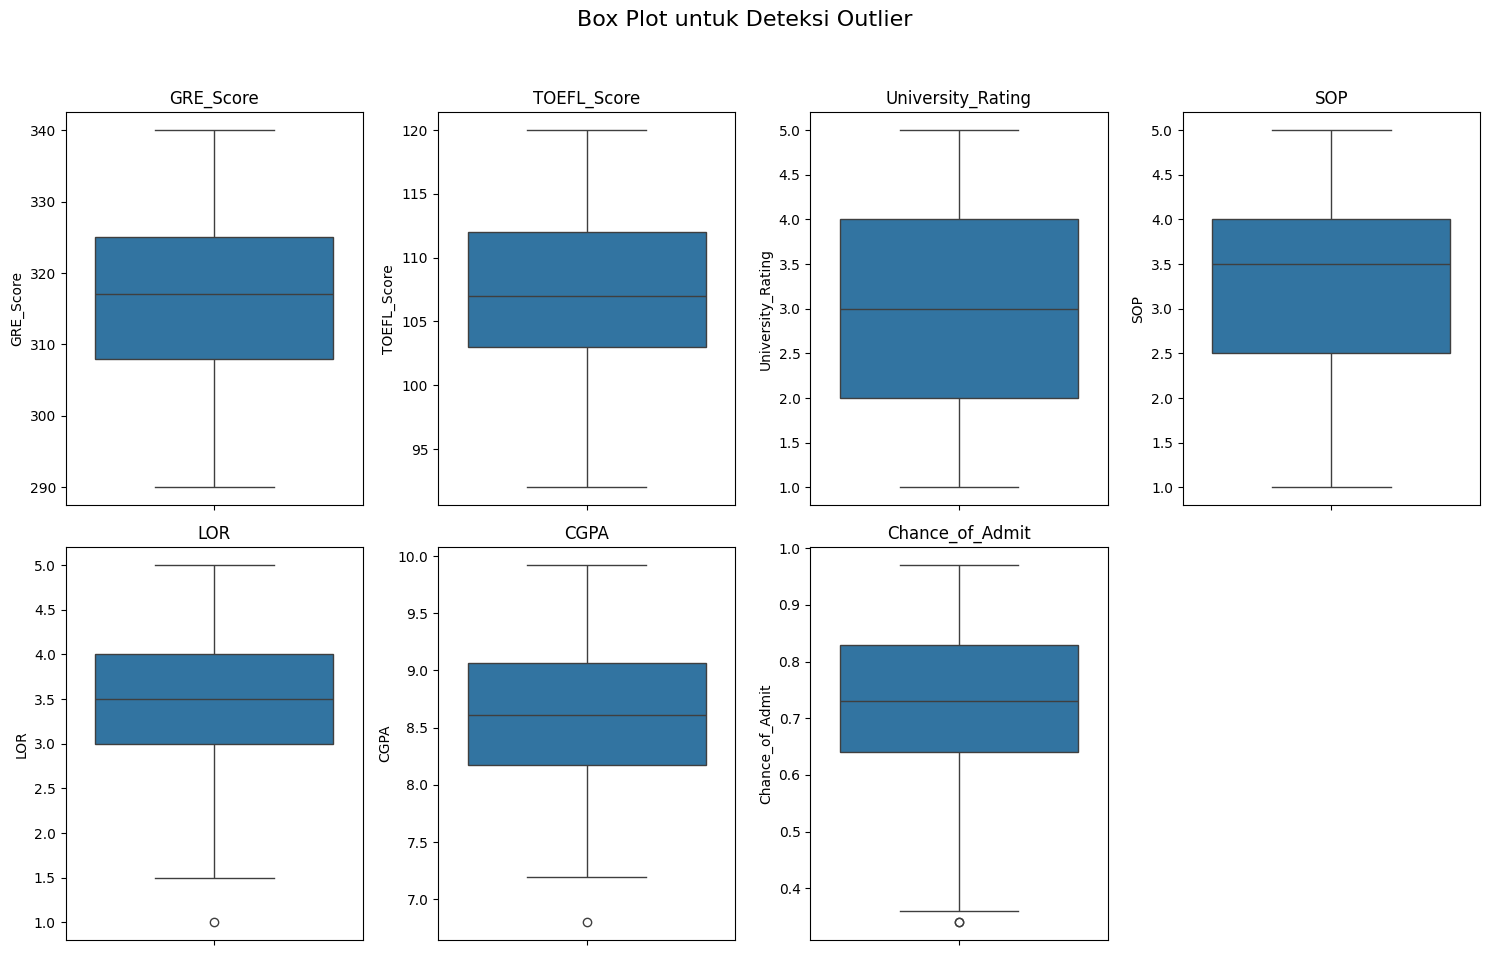

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih kolom numerik yang relevan untuk dicek outliernya
numerical_features = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Chance_of_Admit']

# Atur ukuran plot
plt.figure(figsize=(15, 10))
plt.suptitle("Box Plot untuk Deteksi Outlier", fontsize=16)

# Buat box plot untuk setiap fitur
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(feature)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

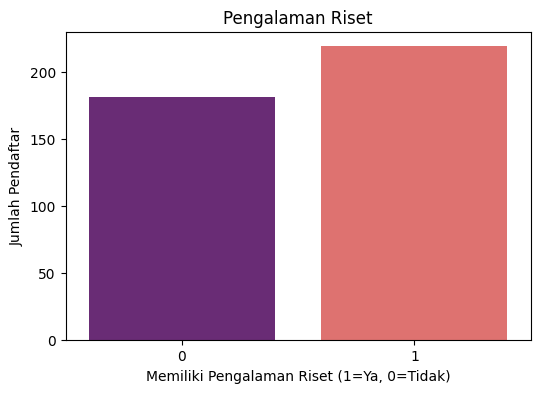

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Research', data=df, hue='Research', palette='magma', legend=False)
plt.title('Pengalaman Riset')
plt.xlabel('Memiliki Pengalaman Riset (1=Ya, 0=Tidak)')
plt.ylabel('Jumlah Pendaftar')
plt.show()

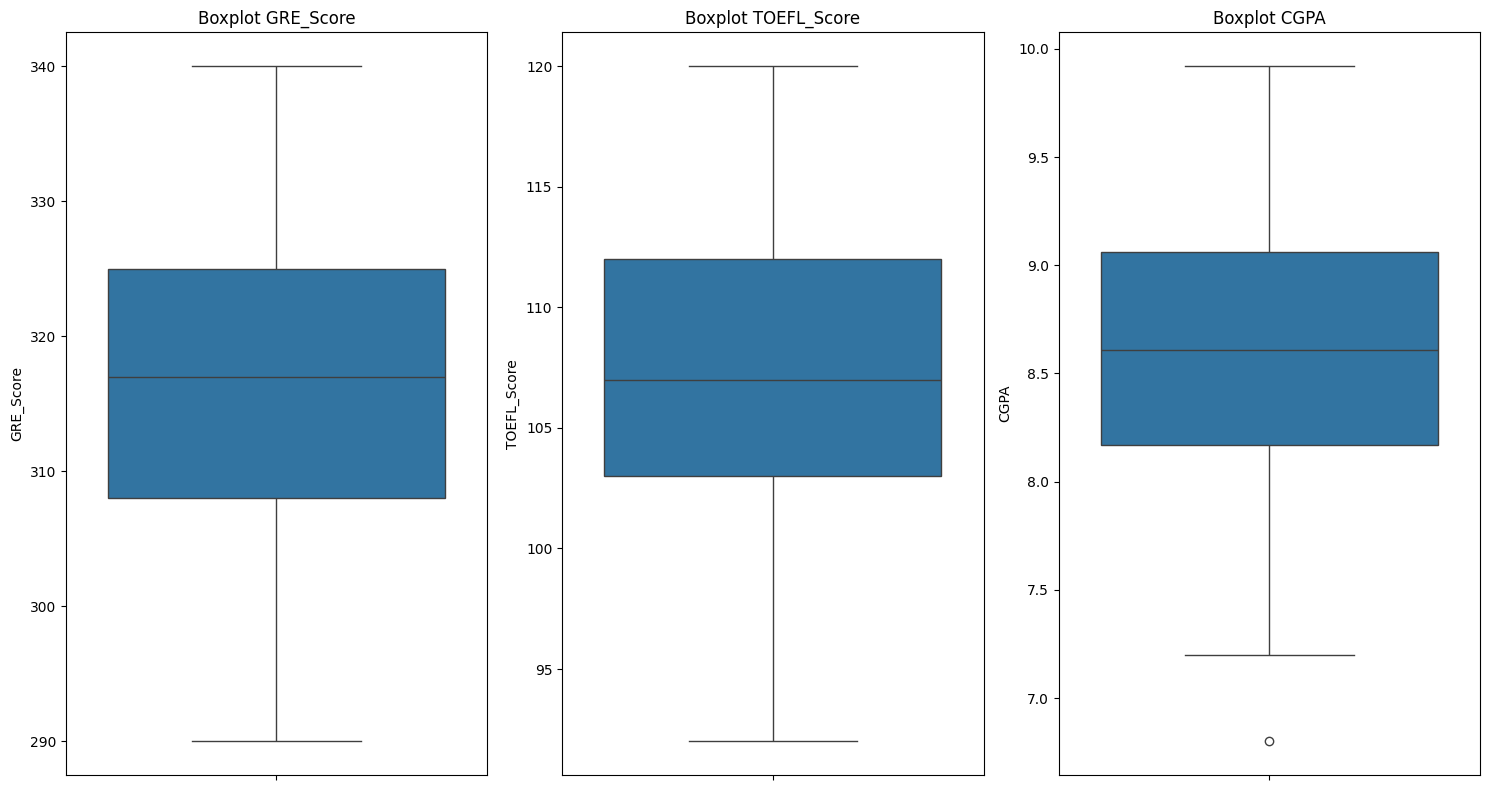

In [16]:
# 9. Outlier Detection
plt.figure(figsize=(15, 8))
for i, col in enumerate(['GRE_Score', 'TOEFL_Score', 'CGPA'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

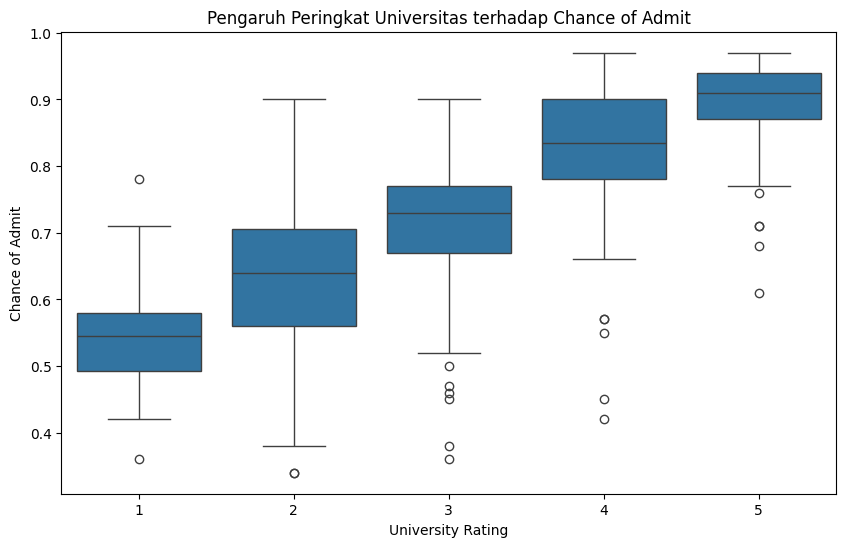

In [17]:
# 10. Analisis University Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='University_Rating', y='Chance_of_Admit', data=df)
plt.title('Pengaruh Peringkat Universitas terhadap Chance of Admit')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit')
plt.show()

## Korelasi Feature


Membuat visualisasi untuk hubungan antar fitur...


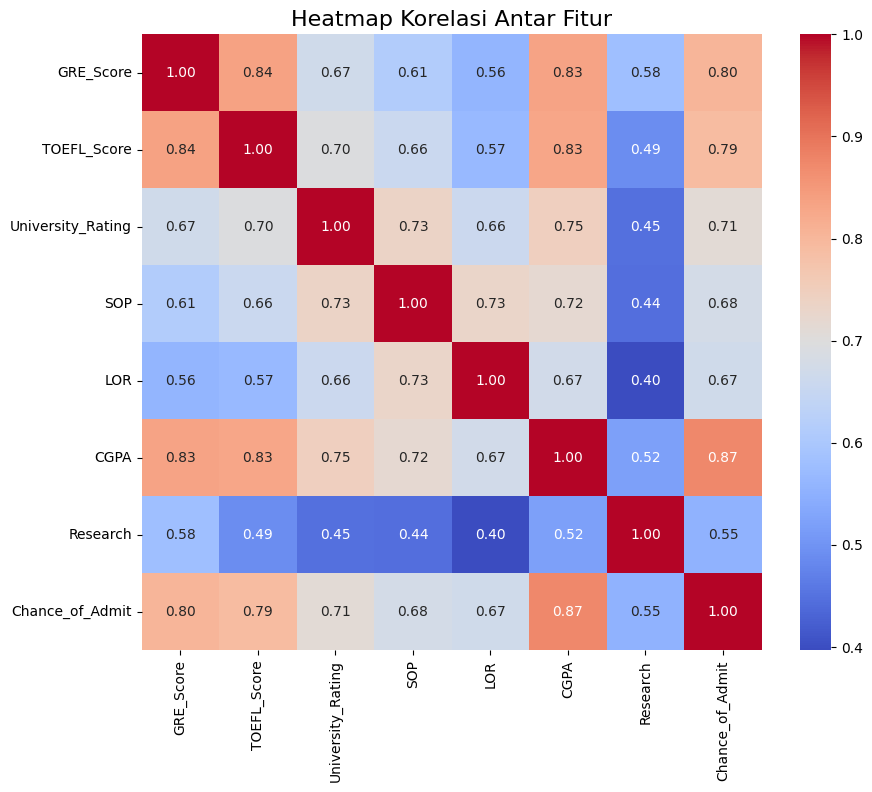

In [18]:
print("\nMembuat visualisasi untuk hubungan antar fitur...")

# 1. Heatmap Korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Fitur', fontsize=16)
plt.show()

Keterangan:
* Mendekati 1 (Warna Merah Terang): Menandakan korelasi positif yang sangat kuat. Jika fitur A naik, maka fitur B juga cenderung naik.

* Mendekati 0 (Warna Netral/Biru Muda): Menandakan korelasi yang lemah atau tidak ada hubungan.

* Mendekati -1: Menandakan korelasi negatif yang sangat kuat. Jika fitur A naik, maka fitur B cenderung turun.

Berikut adalah insight utama yang bisa kita ambil:

1. CGPA (IPK) - Korelasi 0.87: Ini adalah fitur dengan korelasi terkuat. Artinya, Indeks Prestasi Kumulatif (IPK) adalah prediktor paling dominan untuk menentukan peluang seseorang diterima. Semakin tinggi IPK, semakin tinggi pula peluangnya.
2. GRE_Score - Korelasi 0.80: Skor GRE menjadi faktor terkuat kedua. Ini menunjukkan pentingnya skor tes standar dalam proses seleksi.
3. TOEFL_Score - Korelasi 0.79: Mirip dengan GRE, skor kemahiran bahasa Inggris juga memiliki hubungan yang sangat kuat dengan peluang diterima.

Kesimpulan Awal: Faktor akademik (IPK dan skor tes) adalah pilar utama dalam dataset ini.

* Hubungan Kuat Antar Fitur (Potensi Multikolinearitas)
Selain melihat hubungan dengan target, penting juga melihat hubungan antar fitur itu sendiri. Ini membantu kita memahami data lebih dalam dan waspada terhadap multikolinearitas (di mana beberapa fitur memberikan informasi yang tumpang tindih).

1. GRE_Score dan TOEFL_Score (0.84): Ada korelasi yang sangat tinggi antara skor GRE dan TOEFL. Ini sangat masuk akal, karena kandidat yang mempersiapkan diri dengan baik untuk satu tes kemungkinan besar juga berprestasi di tes lainnya.

2. CGPA dan GRE_Score (0.83) / TOEFL_Score (0.83): IPK juga memiliki korelasi yang sangat tinggi dengan kedua skor tes. Ini mengkonfirmasi bahwa kandidat dengan rekam jejak akademik yang kuat (IPK tinggi) cenderung juga mendapatkan skor tes yang tinggi.

Insight Tambahan: Karena ketiga fitur ini (CGPA, GRE, TOEFL) sangat berkorelasi satu sama lain, mereka sebenarnya membawa informasi yang agak serupa. Untuk beberapa model statistik (seperti Regresi Linear), ini bisa menjadi masalah. Namun, untuk model berbasis pohon seperti XGBoost atau Random Forest, ini biasanya tidak menjadi masalah besar.

* Fitur dengan Pengaruh Lebih Rendah (Namun Tetap Penting)
Research (Riset) - Korelasi 0.55: Dibandingkan dengan fitur lainnya, pengalaman riset memiliki korelasi yang paling rendah dengan peluang diterima. Namun, angka 0.55 masih menunjukkan korelasi positif yang cukup kuat. Artinya, memiliki pengalaman riset tetap secara signifikan meningkatkan peluang untuk diterima, meskipun dampaknya tidak sebesar IPK atau skor GRE.

<Figure size 1800x500 with 0 Axes>

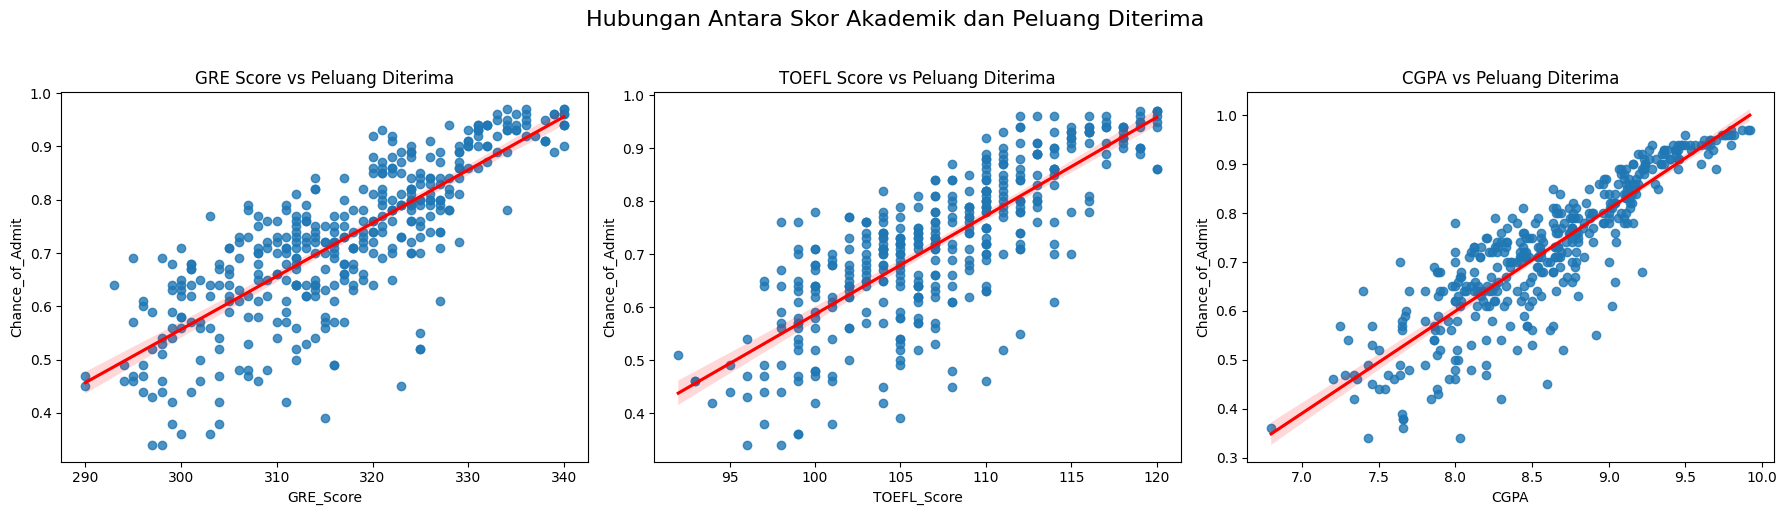

In [19]:
# 2. Scatter Plot untuk melihat hubungan lebih detail
plt.figure(figsize=(18, 5))
plt.suptitle('Hubungan Antara Skor Akademik dan Peluang Diterima', fontsize=16, y=1.02)

# 2. Scatter Plot untuk melihat hubungan lebih detail
plt.figure(figsize=(18, 5))
plt.suptitle('Hubungan Antara Skor Akademik dan Peluang Diterima', fontsize=16, y=1.02)

# Hubungan GRE Score dengan Peluang Diterima
plt.subplot(1, 3, 1)
sns.regplot(x='GRE_Score', y='Chance_of_Admit', data=df, line_kws={"color": "red"})
plt.title('GRE Score vs Peluang Diterima')

# Hubungan TOEFL Score dengan Peluang Diterima
plt.subplot(1, 3, 2)
sns.regplot(x='TOEFL_Score', y='Chance_of_Admit', data=df, line_kws={"color": "red"})
plt.title('TOEFL Score vs Peluang Diterima')

# Hubungan CGPA dengan Peluang Diterima
plt.subplot(1, 3, 3)
sns.regplot(x='CGPA', y='Chance_of_Admit', data=df, line_kws={"color": "red"})
plt.title('CGPA vs Peluang Diterima')

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [27]:
def handle_outliers_iqr(df, columns):
    """
    Menangani outlier pada kolom numerik dengan metode capping (IQR)
    dan menampilkan perbandingan nilai sebelum dan sesudah.
    """
    print("--- Menangani Outlier dengan Metode Capping (IQR) ---\n")
    for column in columns:
        print(f"🔄 Memproses kolom: {column}")

        # Simpan dan tampilkan statistik sebelum penanganan
        min_before = df[column].min()
        max_before = df[column].max()
        print(f"  Nilai SEBELUM penanganan -> Min: {min_before:.4f}, Max: {max_before:.4f}")

        # 1. Hitung Q1, Q3, dan IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # 2. Tentukan batas bawah dan batas atas
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Hitung jumlah outlier
        outliers_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        print(f"  Ditemukan {outliers_count} outlier (Batas Bawah: {lower_bound:.4f}, Batas Atas: {upper_bound:.4f}).")

        # 3. Lakukan capping dengan np.clip
        df[column] = np.clip(df[column], lower_bound, upper_bound)

        # Simpan dan tampilkan statistik setelah penanganan
        min_after = df[column].min()
        max_after = df[column].max()
        print(f"  Nilai SESUDAH penanganan -> Min: {min_after:.4f}, Max: {max_after:.4f}\n")

    print("✅ Proses penanganan outlier selesai.")
    return df


In [28]:
df

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [30]:
# 2. Membersihkan data dari nilai yang hilang
df = df.dropna()
print("✅ Data yang hilang sudah dibersihkan.")

# 5. Tampilkan 5 baris pertama untuk verifikasi
print("\nData setelah pembersihan awal:")
print(df.head())

✅ Data yang hilang sudah dibersihkan.

Data setelah pembersihan awal:
   GRE_Score  TOEFL_Score  University_Rating  SOP  LOR  CGPA  Research  \
0        337          118                  4  4.5  4.5  9.65         1   
1        324          107                  4  4.0  4.5  8.87         1   
2        316          104                  3  3.0  3.5  8.00         1   
3        322          110                  3  3.5  2.5  8.67         1   
4        314          103                  2  2.0  3.0  8.21         0   

   Chance_of_Admit  
0             0.92  
1             0.76  
2             0.72  
3             0.80  
4             0.65  


In [31]:
# Menentukan kolom mana yang akan di-handle outlier-nya
columns_to_handle = ['LOR', 'CGPA']

# Panggil fungsi
df_cleaned = handle_outliers_iqr(df.copy(), columns_to_handle) # Gunakan .copy() agar tidak mengubah df asli

print("\nData setelah penanganan outlier (5 baris pertama):")
print(df_cleaned.head())

--- Menangani Outlier dengan Metode Capping (IQR) ---

🔄 Memproses kolom: LOR
  Nilai SEBELUM penanganan -> Min: 1.5000, Max: 5.0000
  Ditemukan 0 outlier (Batas Bawah: 1.5000, Batas Atas: 5.5000).
  Nilai SESUDAH penanganan -> Min: 1.5000, Max: 5.0000

🔄 Memproses kolom: CGPA
  Nilai SEBELUM penanganan -> Min: 6.8312, Max: 9.9200
  Ditemukan 0 outlier (Batas Bawah: 6.8312, Batas Atas: 10.4013).
  Nilai SESUDAH penanganan -> Min: 6.8312, Max: 9.9200

✅ Proses penanganan outlier selesai.

Data setelah penanganan outlier (5 baris pertama):
   GRE_Score  TOEFL_Score  University_Rating  SOP  LOR  CGPA  Research  \
0        337          118                  4  4.5  4.5  9.65         1   
1        324          107                  4  4.0  4.5  8.87         1   
2        316          104                  3  3.0  3.5  8.00         1   
3        322          110                  3  3.5  2.5  8.67         1   
4        314          103                  2  2.0  3.0  8.21         0   

   Chance_o

In [32]:
print("📊 Membagi data menjadi data latih dan data uji...")

target_column = 'Chance_of_Admit'
X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]

# Membagi data dengan perbandingan 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Ukuran data latih (X_train): {X_train.shape}")
print(f"Ukuran data uji (X_test): {X_test.shape}")

📊 Membagi data menjadi data latih dan data uji...
Ukuran data latih (X_train): (320, 7)
Ukuran data uji (X_test): (80, 7)


In [36]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

base_path = "/content"

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

output_folder = f"{base_path}/data_clean"
os.makedirs(output_folder, exist_ok=True)

# Menyimpan file ke dalam folder 'data_clean'
train_df.to_csv(f"{output_folder}/train_clean.csv", index=False)
test_df.to_csv(f"{output_folder}/test_clean.csv", index=False)

print("\n" + "="*40)
print("✅ Proses Preprocessing Selesai!")
print("="*40)
print(f"Data training tersimpan di: {output_folder}/train_clean.csv ({len(train_df)} baris)")
print(f"Data testing tersimpan di: {output_folder}/test_clean.csv ({len(test_df)} baris)")


✅ Proses Preprocessing Selesai!
Data training tersimpan di: /content/data_clean/train_clean.csv (320 baris)
Data testing tersimpan di: /content/data_clean/test_clean.csv (80 baris)
